In [88]:
import scanpy as sc
import anndata as ad
import numpy as np
import scmulti
from random import shuffle
from scipy import sparse
from matplotlib import pyplot as plt

In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the dataset

In [90]:
rna_kotliarov = sc.read_h5ad('../data/kotliarov-2020/expressions.h5ad')
rna_kotliarov.var_names_make_unique()
rna_kotliarov

AnnData object with n_obs × n_vars = 53196 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [91]:
cite_kotliarov = sc.read_h5ad('../data/kotliarov-2020/protein.h5ad')
cite_kotliarov.var_names_make_unique()
cite_kotliarov

AnnData object with n_obs × n_vars = 53196 × 87
    obs: 'n_genes', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [92]:
rna10x = sc.read_h5ad('../data/10xpbmc10k-2020/expressions.h5ad')
rna10x.var_names_make_unique()
rna10x

AnnData object with n_obs × n_vars = 10000 × 3999
    obs: 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [93]:
atac10x = sc.read_h5ad('../data/10xpbmc10k-2020/peaks.h5ad')
atac10x.var_names_make_unique()
atac10x

AnnData object with n_obs × n_vars = 10000 × 40018
    obs: 'cell_type', 'nb_features'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [94]:
rna_kotliarov.obs['cell_type'] = rna_kotliarov.obs['cluster_level1'].astype('category')
cite_kotliarov.obs['cell_type'] = cite_kotliarov.obs['cluster_level1'].astype('category')

In [95]:
rna_gayoso = sc.read_h5ad('../data/gayoso-steier-2020/expressions.h5ad')
rna_gayoso.obs['cell_type'] = rna_gayoso.obs['cell_types']
rna_gayoso

AnnData object with n_obs × n_vars = 30293 × 3999
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'cell_type'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'hvg', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [96]:
rna_gayoso.var_names = rna_gayoso.var_names.str.upper()
rna_gayoso.var_names_make_unique()

In [97]:
rna_granja = sc.read_h5ad('../data/granja-2019/expressions-ctrl.h5ad')
rna_granja

AnnData object with n_obs × n_vars = 35434 × 3172
    obs: 'Group', 'nUMI_pre', 'nUMI', 'nGene', 'cell_type', 'Barcode', 'condition', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_id', 'exonLength', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_umap'

## Make all datasets 10k cell long

In [98]:
n_samples = 10000

granja_sample_indices = np.random.choice(rna_granja.shape[0], size=n_samples, replace=False)
kotliarov_sample_indices = np.random.choice(rna_kotliarov.shape[0], size=n_samples, replace=False)
gayoso_sample_indices = np.random.choice(rna_gayoso.shape[0], size=n_samples, replace=False)

rna_granja = rna_granja[granja_sample_indices]
rna_kotliarov = rna_kotliarov[kotliarov_sample_indices]
cite_kotliarov = cite_kotliarov[kotliarov_sample_indices]
rna_gayoso = rna_gayoso[gayoso_sample_indices]

## Allign the labels

In [99]:
rna_kotliarov.obs.cell_type.cat.categories

Index(['CD4 naive', 'CD4 memory T', 'Classical monocytes and mDC', 'B',
       'CD8 memory T', 'NK', 'CD8 naive', 'Unconventional T cells',
       'Non-classical monocytes', 'pDC'],
      dtype='object')

In [100]:
rna_gayoso.obs.cell_type.cat.categories

Index(['Activated CD4 T', 'B1 B', 'CD122+ CD8 T', 'CD4 T', 'CD8 T',
       'Erythrocytes', 'GD T', 'ICOS-high Tregs', 'Ifit3-high B',
       'Ifit3-high CD4 T', 'Ifit3-high CD8 T', 'Ly6-high mono', 'Ly6-low mono',
       'MZ B', 'MZ/Marco-high macrophages', 'Mature B', 'Migratory DCs', 'NK',
       'NKT', 'Neutrophils', 'Plasma B', 'Red-pulp macrophages',
       'Transitional B', 'Tregs', 'cDC1s', 'cDC2s', 'pDCs'],
      dtype='object')

In [101]:
new_cell_types_gayoso = {'Activated CD4 T': 'CD4 memory', 
                         'B1 B': 'B', 
                         'CD122+ CD8 T': 'Unconventional T cells', 
                         'CD4 T': 'CD4 naive', 
                         'CD8 T': 'CD8 naive',
                         'Erythrocytes': 'Erythrocytes', 
                         'GD T': 'Unconventional T cells', 
                         'ICOS-high Tregs': 'Unconventional T cells', 
                         'Ifit3-high B': 'B',
                         'Ifit3-high CD4 T': 'Unconventional T cells', 
                         'Ifit3-high CD8 T': 'Unconventional T cells', 
                         'Ly6-high mono' : 'Classical monocytes and mDC', 
                         'Ly6-low mono': 'Non-classical monocytes',
                         'MZ B': 'B', 
                         'MZ/Marco-high macrophages': 'Macrophages', 
                         'Mature B': 'B', 
                         'Migratory DCs': 'Classical monocytes and mDC', 
                         'NK': 'NK',
                         'NKT': 'Unconventional T cells', 
                         'Neutrophils': 'Neutrophils', 
                         'Plasma B': 'B', 
                         'Red-pulp macrophages': 'Macrophages',
                         'Transitional B': 'B', 
                         'Tregs': 'Unconventional T cells', 
                         'cDC1s': 'Classical monocytes and mDC', 
                         'cDC2s': 'Classical monocytes and mDC', 
                         'pDCs': 'pDC'
    
}

In [102]:
rna_granja.obs.cell_type.cat.categories

Index(['01_HSC', '02_Early.Eryth', '03_Late.Eryth', '04_Early.Baso',
       '05_CMP.LMPP', '06_CLP.1', '07_GMP', '08_GMP.Neut', '09_pDC', '10_cDC',
       '11_CD14.Mono.1', '12_CD14.Mono.2', '13_CD16.Mono', '14_Unk',
       '15_CLP.2', '16_Pre.B', '17_B', '18_Plasma', '19_CD8.N', '20_CD4.N1',
       '21_CD4.N2', '22_CD4.M', '23_CD8.EM', '24_CD8.CM', '25_NK', '26_Unk'],
      dtype='object')

In [103]:
new_cell_types_granja = {'01_HSC': 'HSC', 
                         '02_Early.Eryth':'Erythrocytes', 
                         '03_Late.Eryth': 'Erythrocytes', 
                         '04_Early.Baso': 'Basophils',
                         '05_CMP.LMPP' : 'CMP', 
                         '06_CLP.1': 'CLP', 
                         '07_GMP' : 'GMP', 
                         '08_GMP.Neut' : 'Neutrophils', 
                         '09_pDC': 'pDC', 
                         '10_cDC': 'Classical monocytes and mDC',
                         '11_CD14.Mono.1': 'Classical monocytes and mDC', 
                         '12_CD14.Mono.2': 'Classical monocytes and mDC', 
                         '13_CD16.Mono': 'Non-classical monocytes', 
                         '14_Unk': 'Unknown',
                         '15_CLP.2' : 'CLP', 
                         '16_Pre.B' : 'B', 
                         '17_B': 'B', 
                         '18_Plasma': 'Plasma', 
                         '19_CD8.N': 'CD8 naive', 
                         '20_CD4.N1': 'CD4 naive',
                         '21_CD4.N2': 'CD4 naive', 
                         '22_CD4.M': 'CD4 memory T', 
                         '23_CD8.EM': 'CD8 memory T', 
                         '24_CD8.CM': 'CD8 memory T', 
                         '25_NK': 'NK', 
                         '26_Unk': 'Unknown'
    
}

In [104]:
rna10x.obs.cell_type.cat.categories

Index(['CD56 (bright) NK cells', 'CD56 (dim) NK cells', 'MAIT T cells',
       'classical monocytes', 'effector CD8 T cells', 'intermediate monocytes',
       'memory B cells', 'memory CD4 T cells', 'myeloid DC', 'naive B cells',
       'naive CD4 T cells', 'naive CD8 T cells', 'non-classical monocytes',
       'plasmacytoid DC'],
      dtype='object')

In [105]:
# make types more general for now
new_cell_types_10x = {'CD56 (bright) NK cells': 'NK', 'CD56 (dim) NK cells': 'NK', 'MAIT T cells': 'Unconventional T cells',
                  'classical monocytes': 'Classical monocytes and mDC', 'effector CD8 T cells': 'CD8 effector', 'intermediate monocytes': 'Intermediate monocytes',
                  'memory B cells': 'B', 'memory CD4 T cells': 'CD4 memory T', 'myeloid DC': 'Classical monocytes and mDC', 'naive B cells':'B',
                  'naive CD4 T cells': 'CD4 naive', 'naive CD8 T cells': 'CD8 naive', 'non-classical monocytes': 'Non-classical monocytes',
                   'plasmacytoid DC': 'pDC'
                 }

In [106]:
new_10x_cell_types = [new_cell_types_10x[name] for name in rna10x.obs.cell_type]
new_granja_cell_types = [new_cell_types_granja[name] for name in rna_granja.obs.cell_type]
new_gayoso_cell_types = [new_cell_types_gayoso[name] for name in rna_gayoso.obs.cell_type]

In [107]:
# 10x
rna10x.obs.cell_type = new_10x_cell_types
atac10x.obs.cell_type = new_10x_cell_types

# granja
rna_granja.obs.cell_type = new_granja_cell_types

# gayoso
rna_gayoso.obs.cell_type = new_gayoso_cell_types

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [108]:
rna10x

AnnData object with n_obs × n_vars = 10000 × 3999
    obs: 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

## Choose shared features

In [109]:
# batch 0, 1, 2, 3
common = rna10x.concatenate(rna_gayoso, rna_kotliarov, rna_granja)

In [110]:
rna10x = common[common.obs['batch'] == '0']
rna_gayoso = common[common.obs['batch'] == '1']
rna_kotliarov = common[common.obs['batch'] == '2']
rna_granja = common[common.obs['batch'] == '3']

# Paired setting

## Configure and train the model

In [111]:
model = scmulti.models.MultiVAE(
    adatas=[[rna10x, rna_kotliarov, rna_gayoso, rna_granja], [cite_kotliarov], [atac10x]],
    names=[['scRNA-seq-10x','scRNA-seq-kotliarov', 'scRNA-seq-gayoso', 'scRNA-seq-granja'], ['CITE-seq-kotliarov'], ['ATAC-seq-10x']],
    pair_groups=[[0, 1, 2, 3], [1], [0]],
    z_dim=20,
    h_dim=128,
    hiddens=[],
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-5,
    integ_coef=1e-2,
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [112]:
model.train(
    n_iters=10000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
)

 |██------------------| 10.0% iter=1001/10000, time=529.26(s), loss=1.8344, recon=1.6582, kl=106.7724, integ=17.5147, val_loss=93.0376, val_recon=1.1760, val_kl=149.8526, val_integ=13.2653
 |████----------------| 20.0% iter=2001/10000, time=535.07(s), loss=1.4414, recon=1.3348, kl=212.2552, integ=10.4455, val_loss=81.7224, val_recon=1.0644, val_kl=234.1902, val_integ=8.4217
 |██████--------------| 30.0% iter=3001/10000, time=527.30(s), loss=1.3656, recon=1.2951, kl=273.8842, integ=6.7801, val_loss=76.8846, val_recon=1.0234, val_kl=284.4206, val_integ=5.6603
 |████████------------| 40.0% iter=4001/10000, time=515.55(s), loss=1.3034, recon=1.2543, kl=320.2240, integ=4.5951, val_loss=74.7471, val_recon=1.0095, val_kl=333.7208, val_integ=3.9983
 |██████████----------| 50.0% iter=5001/10000, time=532.41(s), loss=1.2451, recon=1.2092, kl=366.3240, integ=3.2275, val_loss=72.7276, val_recon=0.9917, val_kl=376.9630, val_integ=2.8843
 |████████████--------| 60.0% iter=6001/10000, time=522.79(s),

## Plot training history

In [113]:
model.history

,iteration,train_loss,train_recon,train_kl,train_integ,val_loss,val_recon,val_kl,val_integ
0,1000,1.834406,1.658191,106.772376,17.514736,93.037650,1.175977,149.852588,13.265310
1,2000,1.441400,1.334823,212.255228,10.445452,81.722358,1.064378,234.190187,8.421659
2,3000,1.365631,1.295092,273.884161,6.780064,76.884565,1.023430,284.420628,5.660349
3,4000,1.303417,1.254264,320.223962,4.595083,74.747112,1.009526,333.720828,3.998264
4,5000,1.245105,1.209167,366.323969,3.227470,72.727553,0.991693,376.963043,2.884345
5,6000,1.213375,1.185552,408.273224,2.374031,72.236411,0.990603,422.151485,2.271252
6,7000,1.202907,1.179724,447.211639,1.871058,70.888506,0.975538,455.054133,1.850281
7,8000,1.173519,1.152274,488.108173,1.636319,69.965391,0.963714,488.944038,1.690948
8,9000,1.185521,1.164633,516.129169,1.572627,70.324059,0.969112,512.540614,1.635504
9,9999,1.145879,1.126082,530.709875,1.448947,68.436620,0.943087,532.238087,1.567167


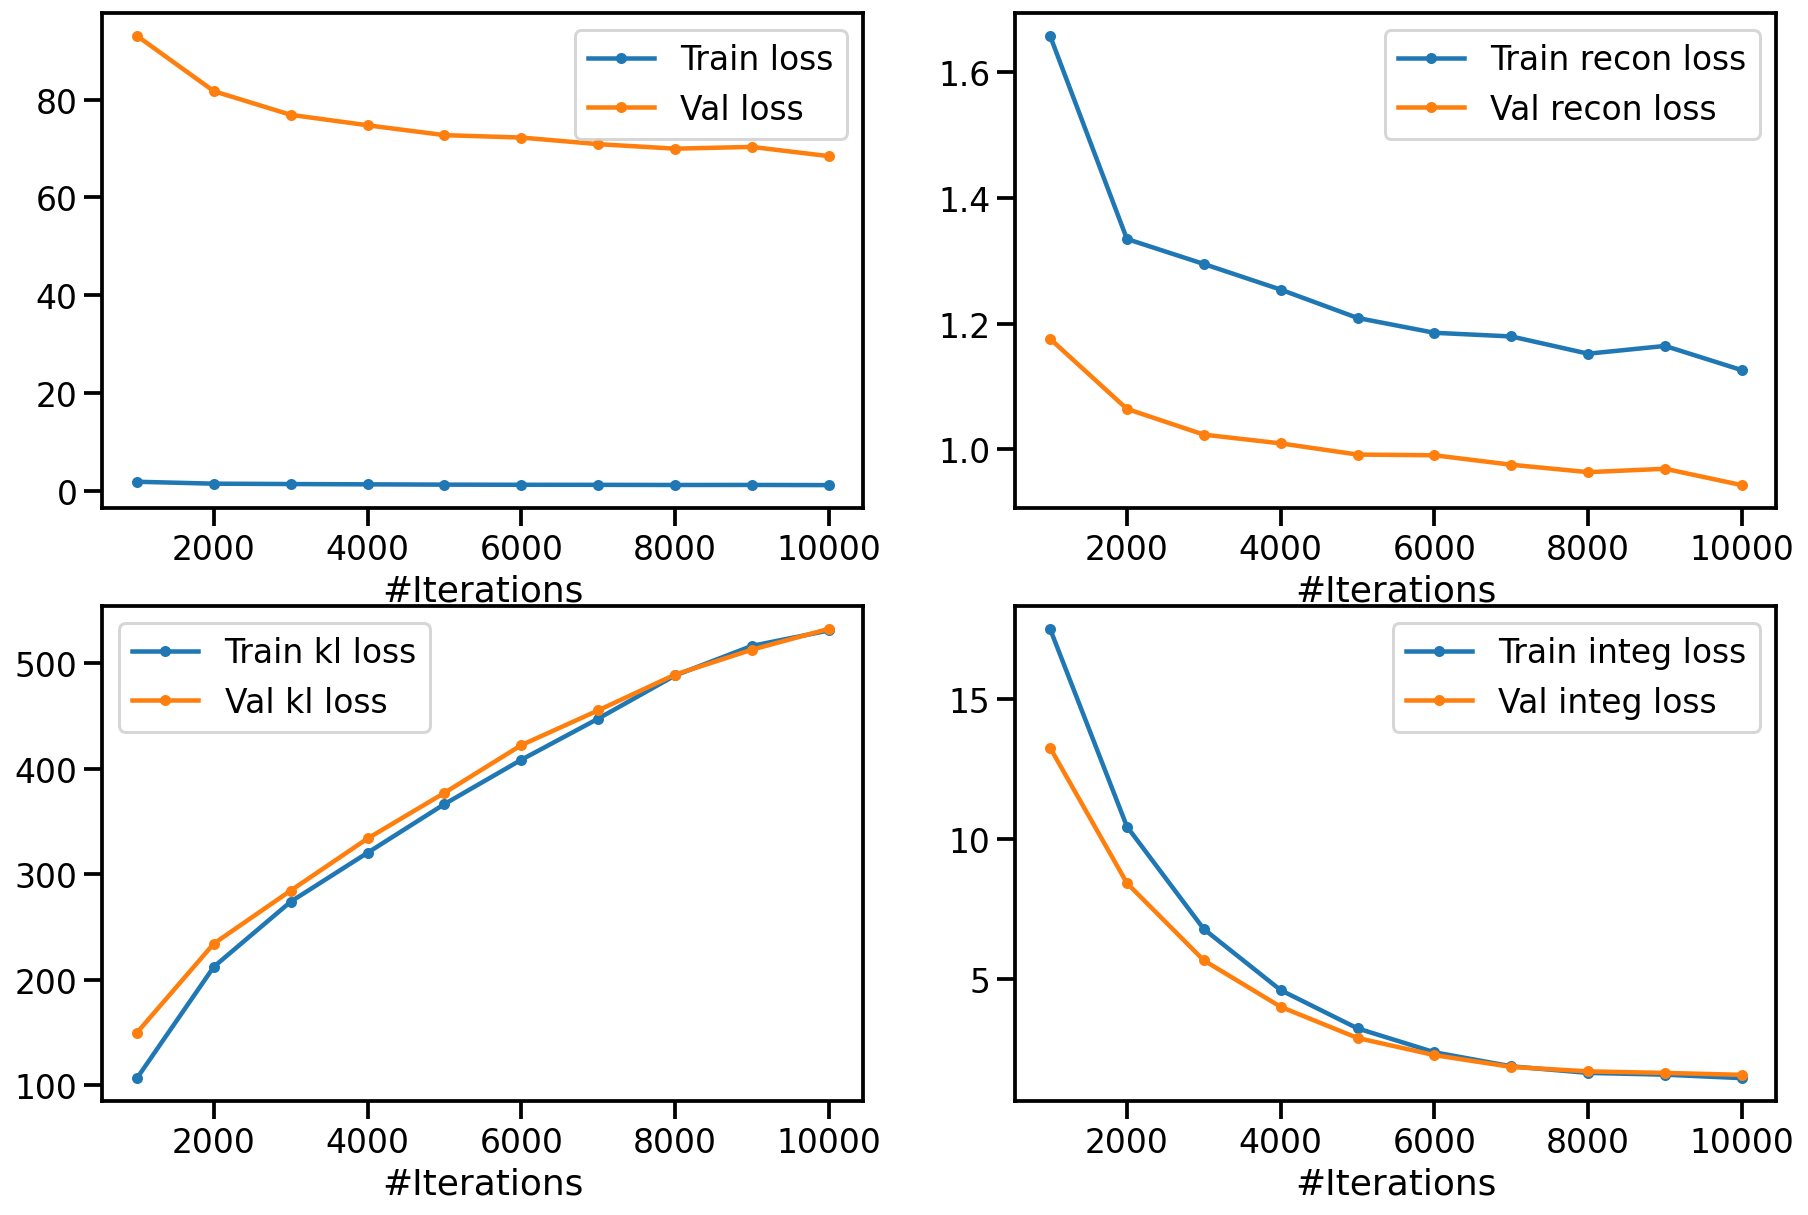

In [114]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

## Recover and visualize the latent space

In [115]:
z = model.predict(
    adatas=[[rna10x, rna_kotliarov, rna_gayoso, rna_granja], [cite_kotliarov], [atac10x]],
    names=[['scRNA-seq-10x','scRNA-seq-kotliarov', 'scRNA-seq-gayoso', 'scRNA-seq-granja'], ['CITE-seq-kotliarov'], ['ATAC-seq-10x']],
    batch_size=64,
)
z

AnnData object with n_obs × n_vars = 60000 × 20
    obs: 'modality', 'cell_type', 'batch'

In [116]:
sc.tl.pca(z, svd_solver='arpack')

... storing 'modality' as categorical
... storing 'cell_type' as categorical


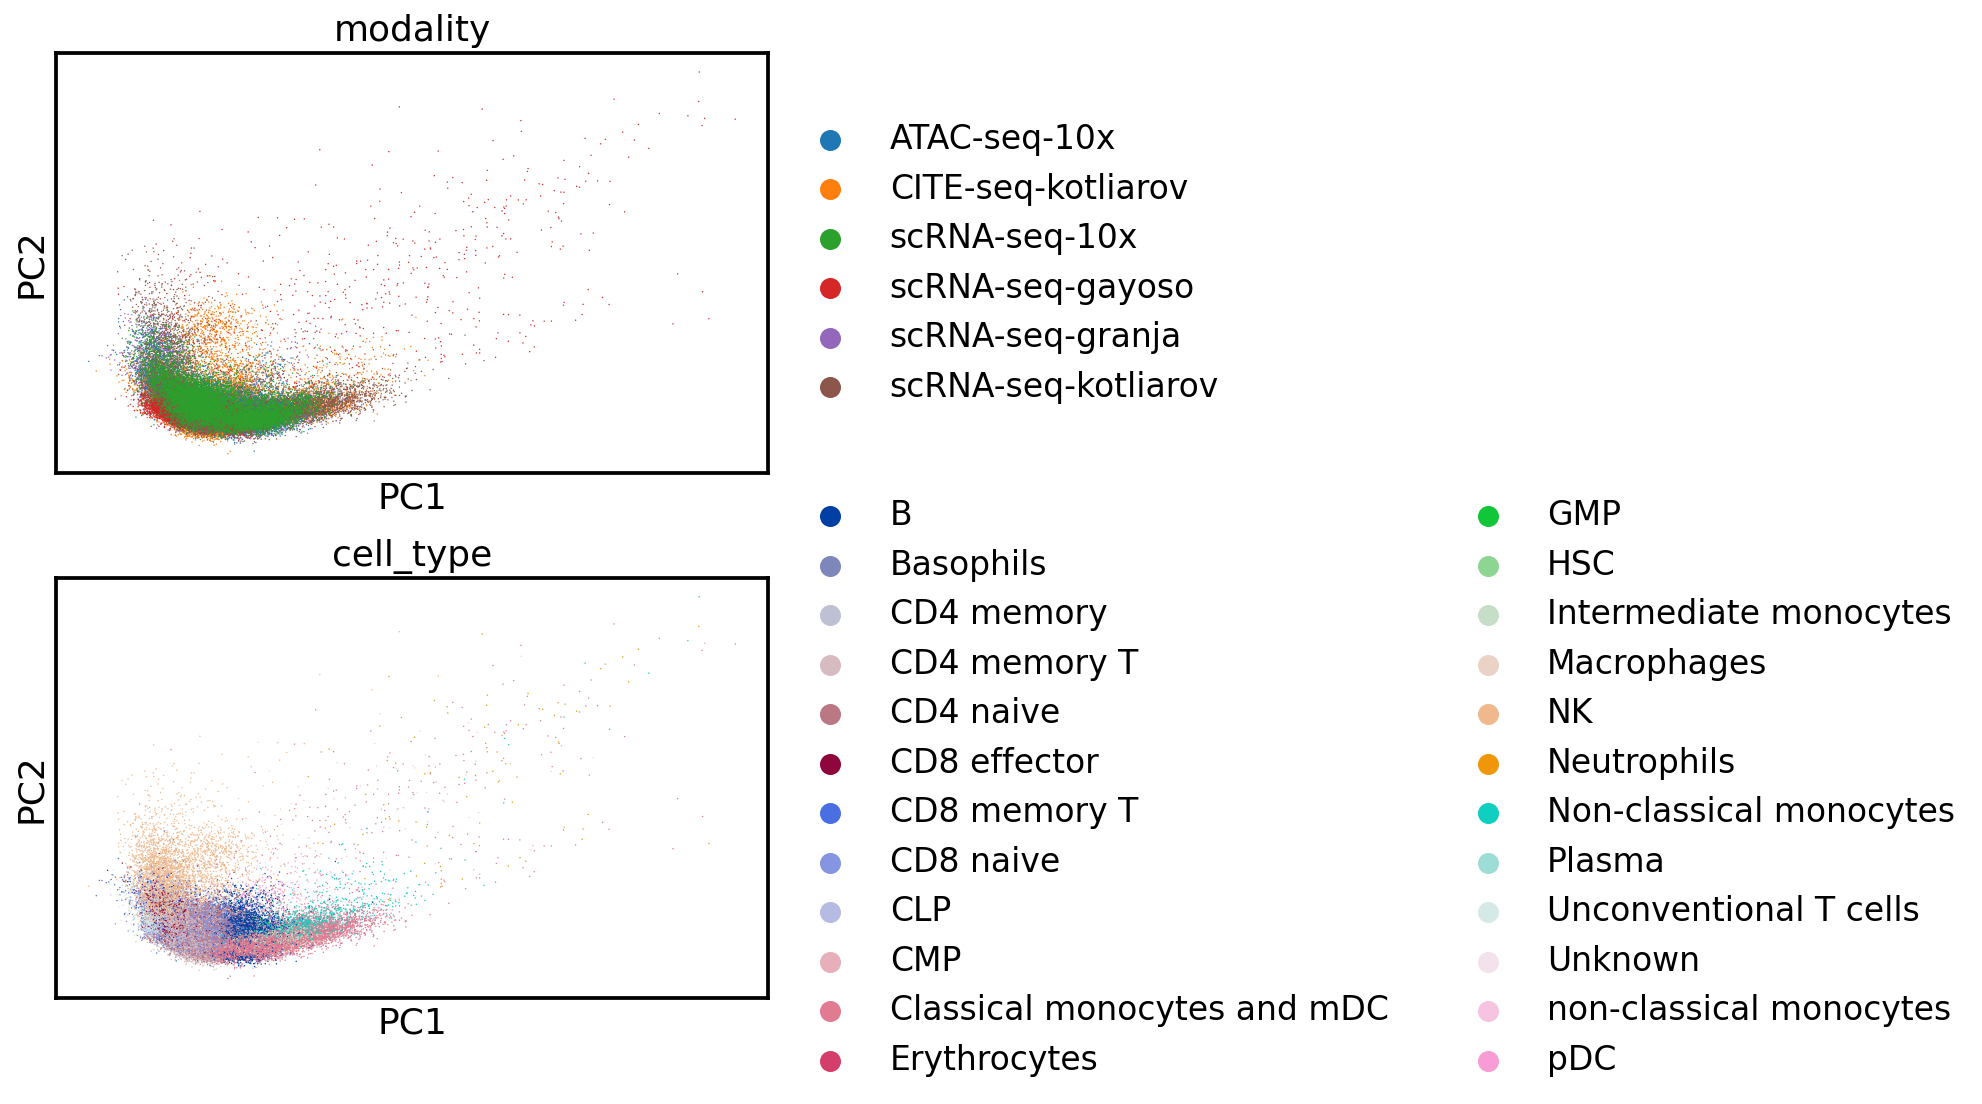

In [117]:
sc.pl.pca(z, color=['modality', 'cell_type'], ncols = 1)

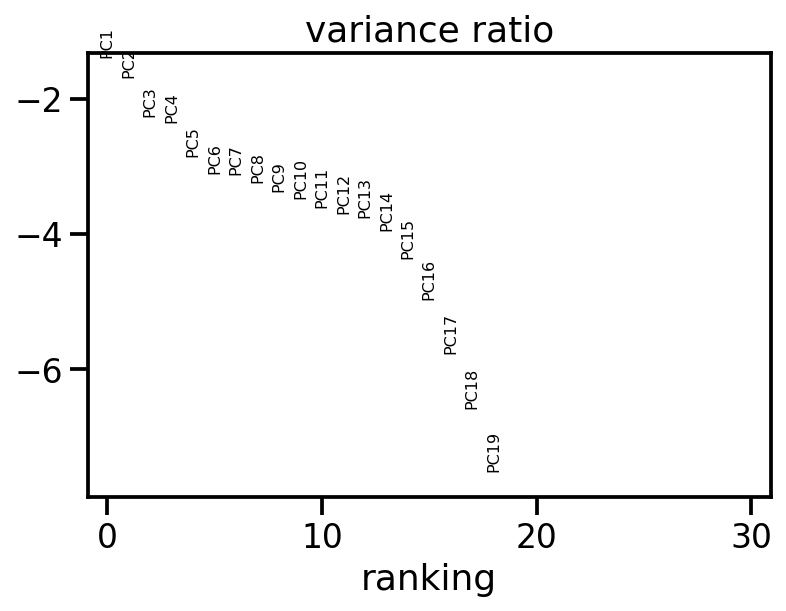

In [118]:
sc.pl.pca_variance_ratio(z, log=True)

In [119]:
sc.pp.neighbors(z, n_neighbors=10, n_pcs=14)

/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities


In [120]:
sc.tl.umap(z)

/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


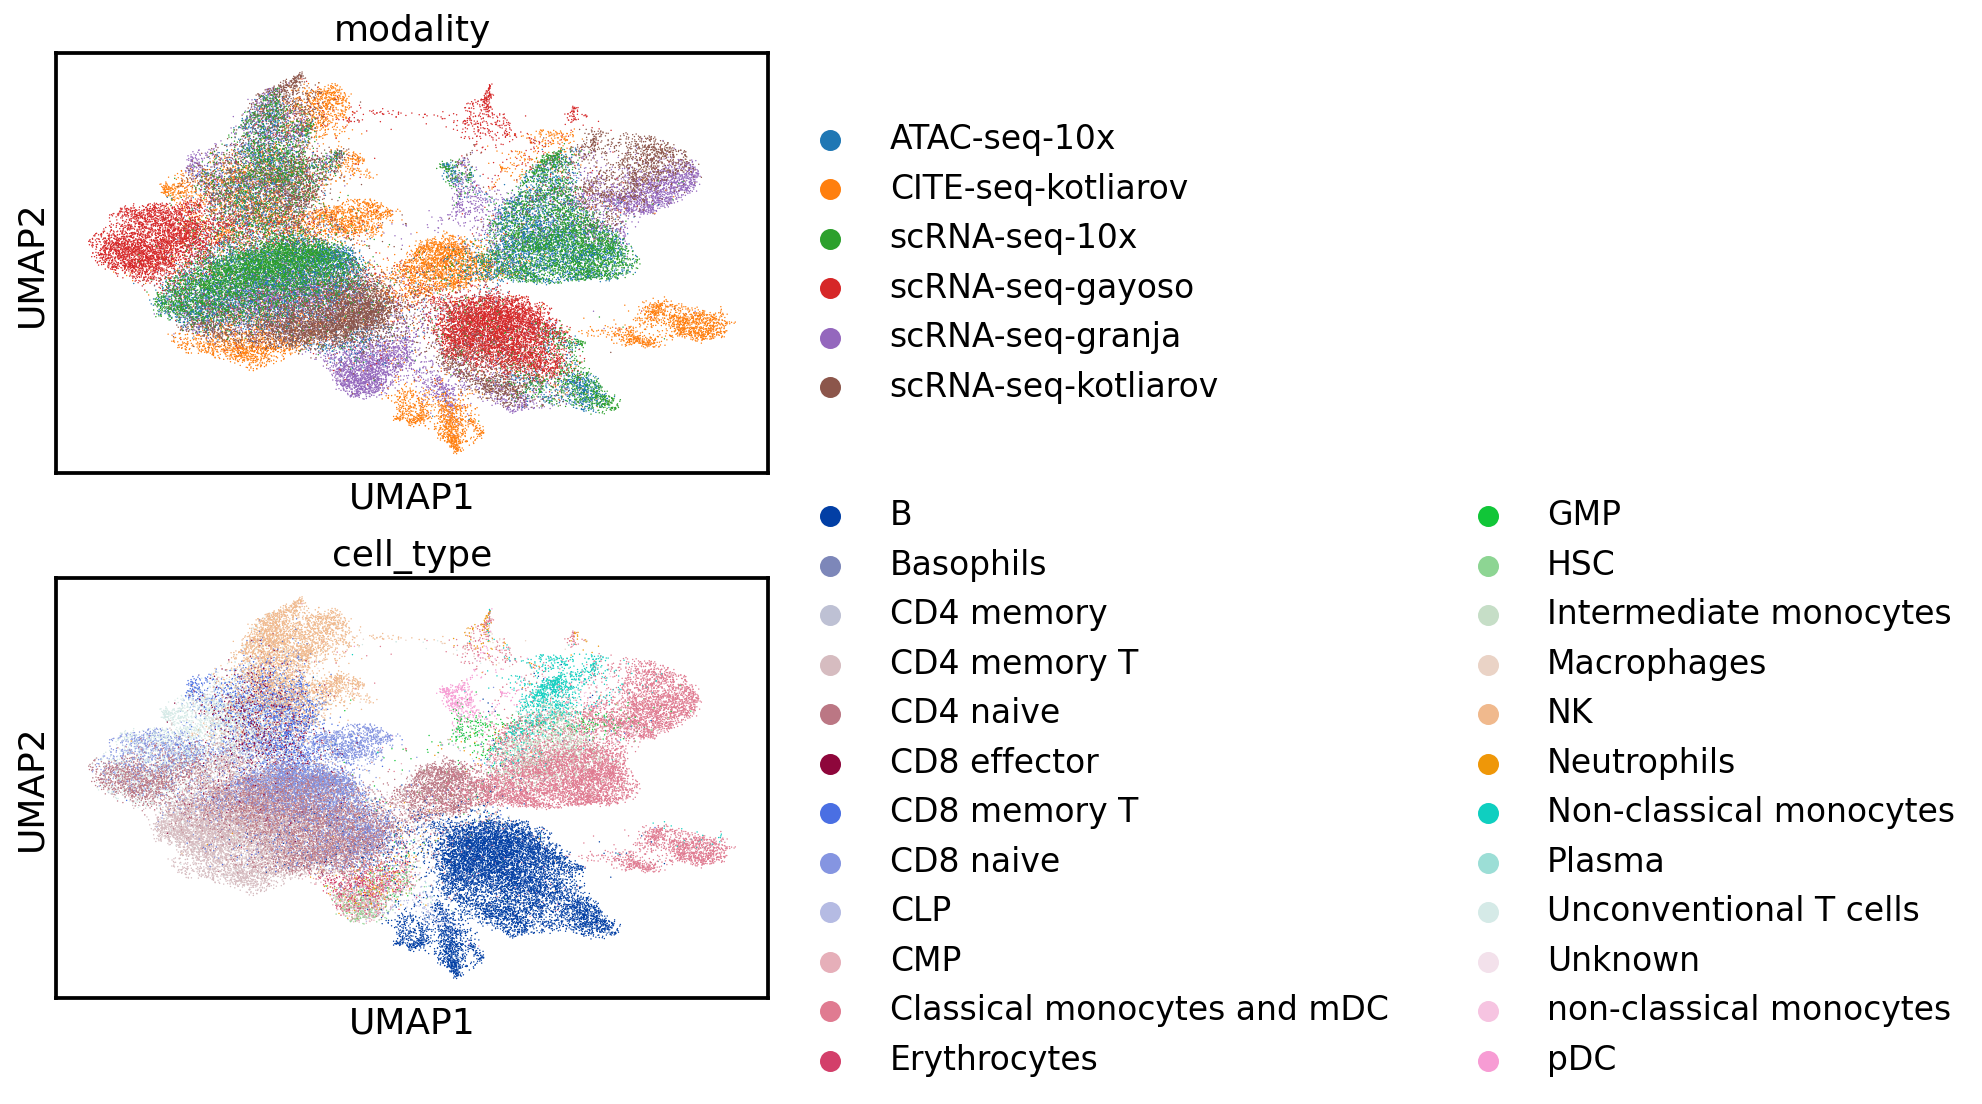

In [121]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

# Metrics

In [122]:
scmulti.metrics.nmi(z, label_key='modality')

0.03537108900658799

In [123]:
scmulti.metrics.asw(z, label_key='modality')

-0.02478444017469883

In [124]:
scmulti.metrics.asw(z, label_key='cell_type')

-0.041679780930280685